In [1]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

# Load generated graphs

In [41]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap = 299 ):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    
    graphs = []
    for i in os.listdir(path)[0:2]:
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name,gap = 0):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name,gap=0):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name,gap=0):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [23]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological stuff

# motifs snap

In [144]:
import networkx as nx
import itertools 

In [145]:

from networkx.algorithms import isomorphism


def count_subgraphs2(graph, subgraph):
    count = 0
    GM = isomorphism.GraphMatcher(graph, subgraph)
    c = 0 
    for i in GM.subgraph_isomorphisms_iter():
        c = c +1 
    return c




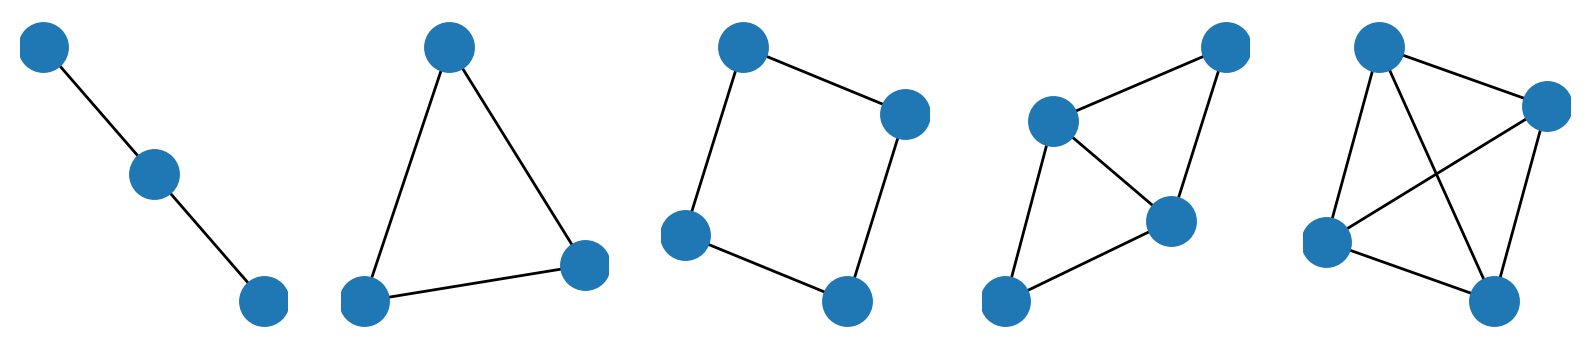

In [146]:
motifs = {"s1":nx.Graph([(1,2),(2,3)]),
         "s2":nx.Graph([(1,2),(2,3),(3,1)]),
         "s3":nx.Graph([(1,2),(2,3),(3,4),(4,1)]),
         "s4":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4)]),
         "s5":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4),(1,3)])}

c = 1
plt.figure(figsize=(10,2))
for k,v in motifs.items():
    plt.subplot(1,5,c)
    nx.draw(v)
    c = c + 1

# load agg graph

In [147]:
file_name = "InVS13"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
etn_gen = load_ETNgen_graph(file_name,gap=299*M)
dym_gen = load_dym_graph(file_name,gap=1*M)
stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/InVS13/InVS13_dym8.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_3.dat
../Competitors_generated_graphs/STM/Multiple_run/InVS13/InVS13_STM_7.dat
../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_6_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/InVS13/InVS13_0_generato_TagGen.dat


In [148]:
len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])

(111, 111, 107, 102, 110)

In [157]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [158]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in etn_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)

In [159]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%10 ==0:
        print(len(tag_gen[0]),c)

107 10
107 20
107 30
107 40
107 50
107 60
107 70
107 80
107 90
107 100


In [160]:
occs_stm = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in stm_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_stm[k].append(occurrences)

In [161]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%10 ==0:
        print(len(dym_gen[0]),c)

110 10
110 20
110 30
110 40
110 50
110 60
110 70
110 80
110 90
110 100
110 110


In [171]:
occs_dym

{'s1': [2,
  0,
  10,
  4,
  10,
  12,
  62,
  12,
  72,
  40,
  92,
  124,
  140,
  196,
  180,
  274,
  412,
  350,
  418,
  474,
  596,
  810,
  868,
  1246,
  1250,
  1254,
  1574,
  2118,
  2054,
  2064,
  2164,
  2334,
  1764,
  2494,
  2636,
  2894,
  2344,
  2654,
  2972,
  3254,
  3362,
  2956,
  2902,
  3258,
  3434,
  3136,
  2572,
  3156,
  3430,
  2998,
  3424,
  3942,
  3142,
  3082,
  3604,
  3336,
  3588,
  3752,
  4008,
  3494,
  4284,
  4358,
  3206,
  4112,
  4722,
  4120,
  4114,
  4062,
  5382,
  4572,
  4624,
  4726,
  4956,
  5000,
  4162,
  6282,
  4550,
  4832,
  4780,
  5194,
  5116,
  4766,
  5586,
  5274,
  5458,
  4894,
  4978,
  4504,
  4530,
  4958,
  4606,
  5096,
  4440,
  5786,
  4912,
  5644,
  5158,
  4786,
  4886,
  4850,
  4876,
  4914,
  5416,
  4516,
  5442,
  5244,
  5698,
  5496,
  5636,
  954],
 's2': [0,
  0,
  0,
  0,
  0,
  0,
  12,
  0,
  12,
  6,
  24,
  12,
  24,
  30,
  30,
  12,
  36,
  24,
  48,
  12,
  72,
  66,
  54,
  150,
  102,
 

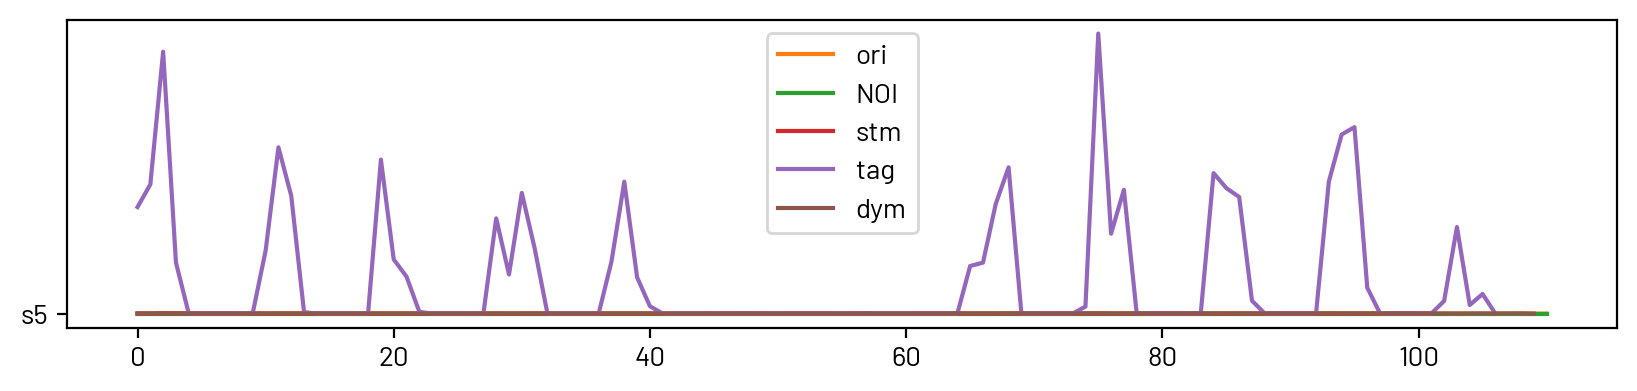

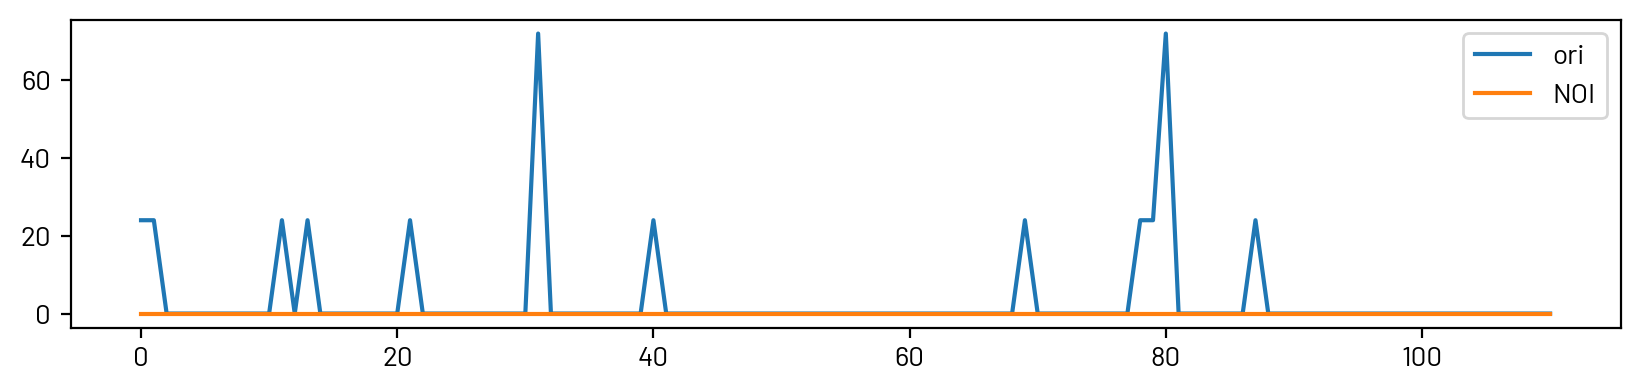

In [172]:
s = "s5"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
#plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
#plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()

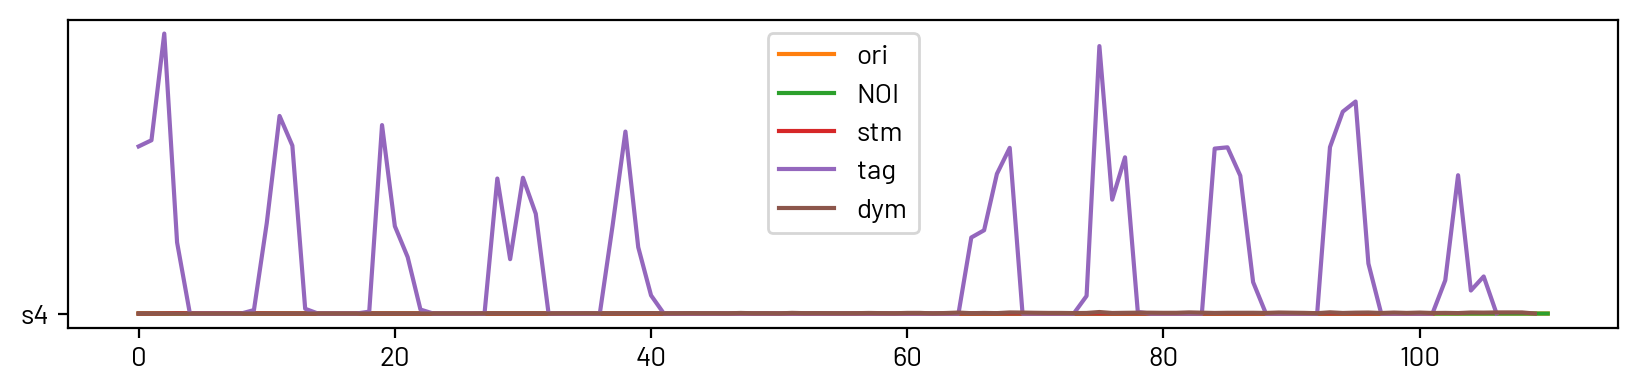

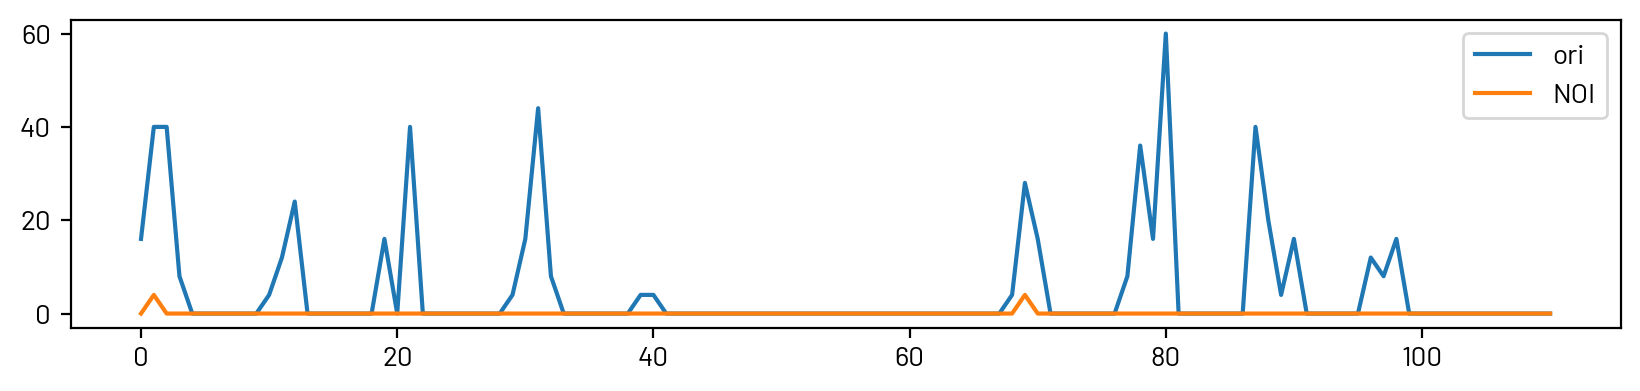

In [173]:
s = "s4"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
#plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
#plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()

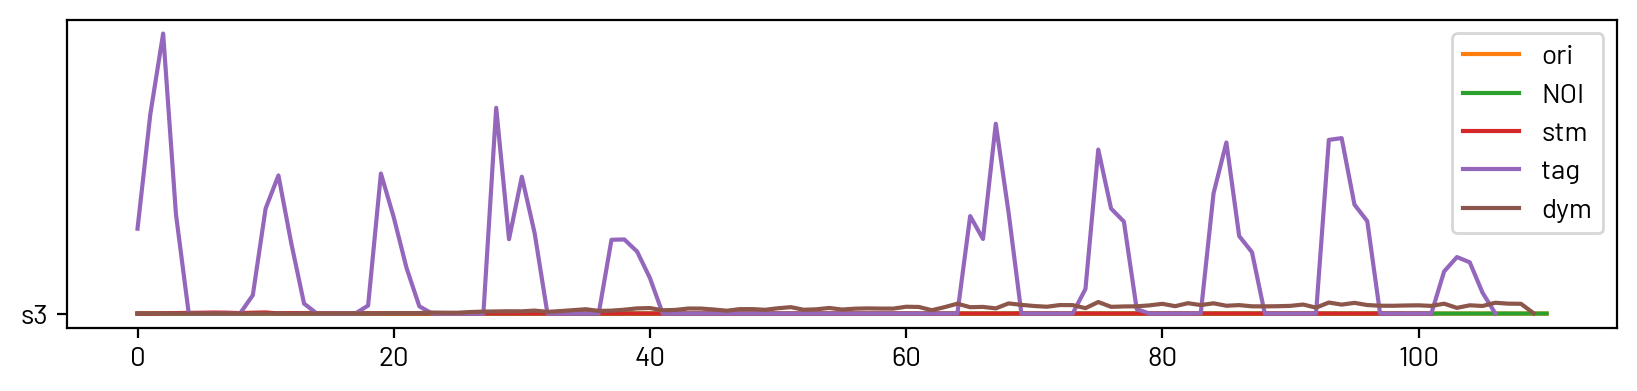

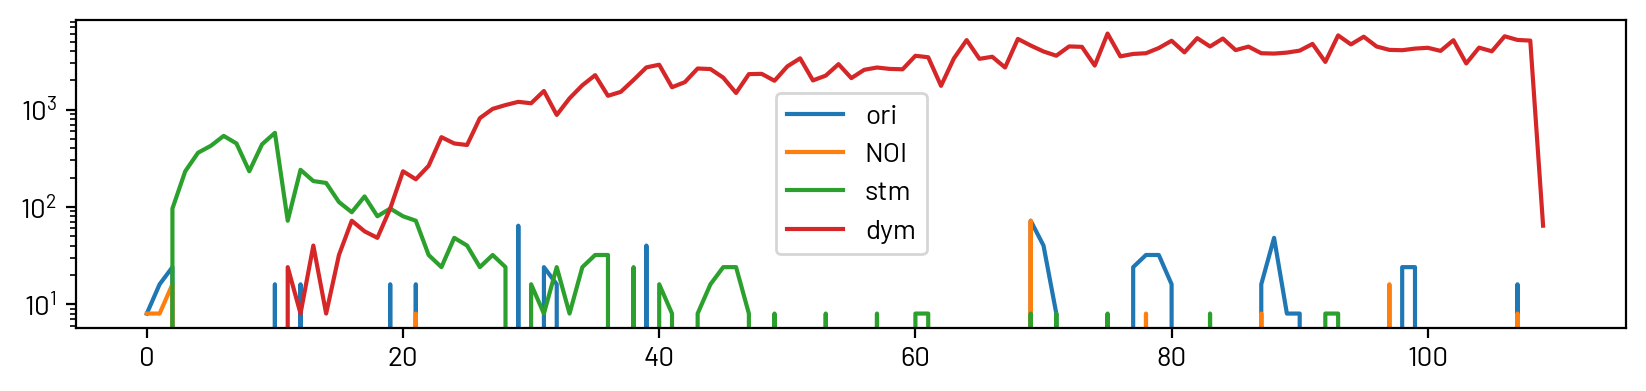

In [182]:
s = "s3"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

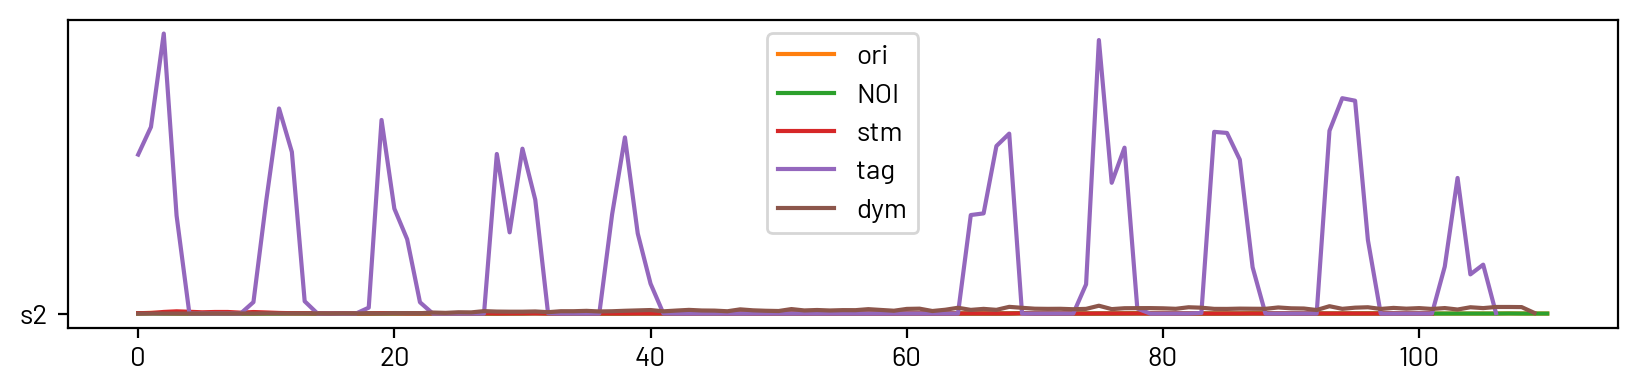

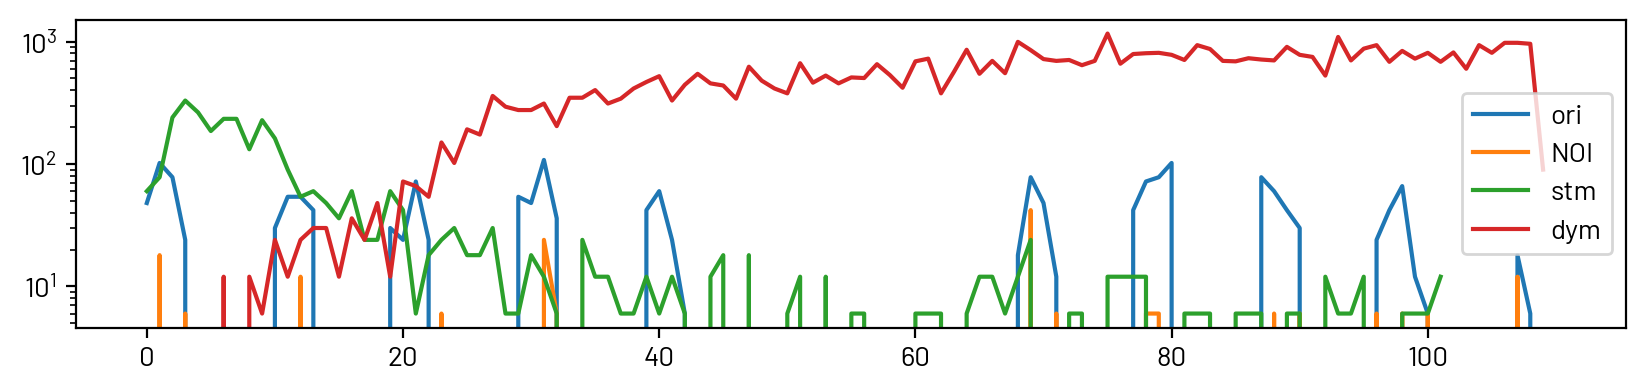

In [181]:
s = "s2"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")

plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

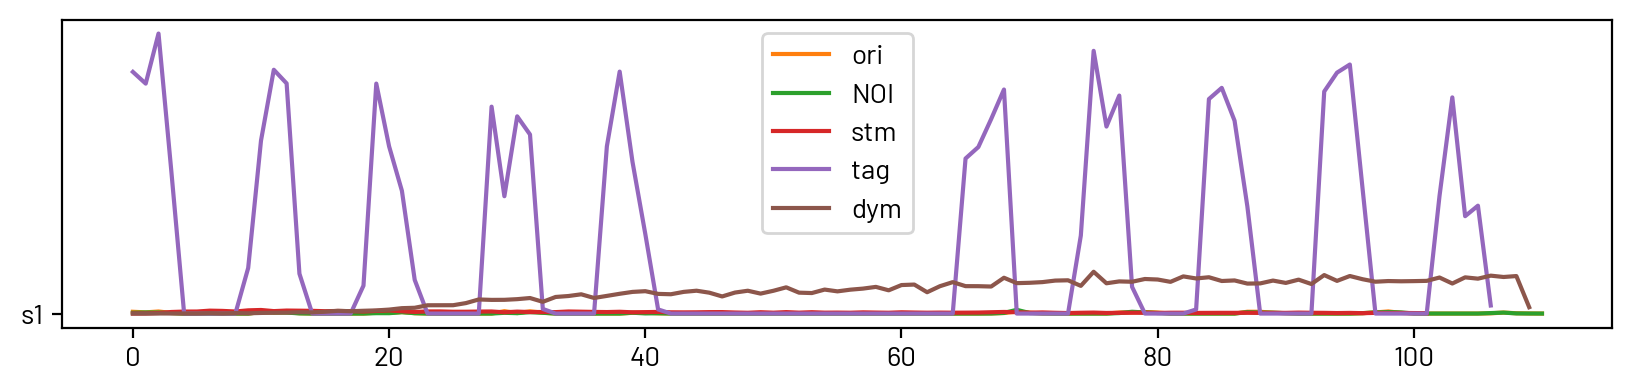

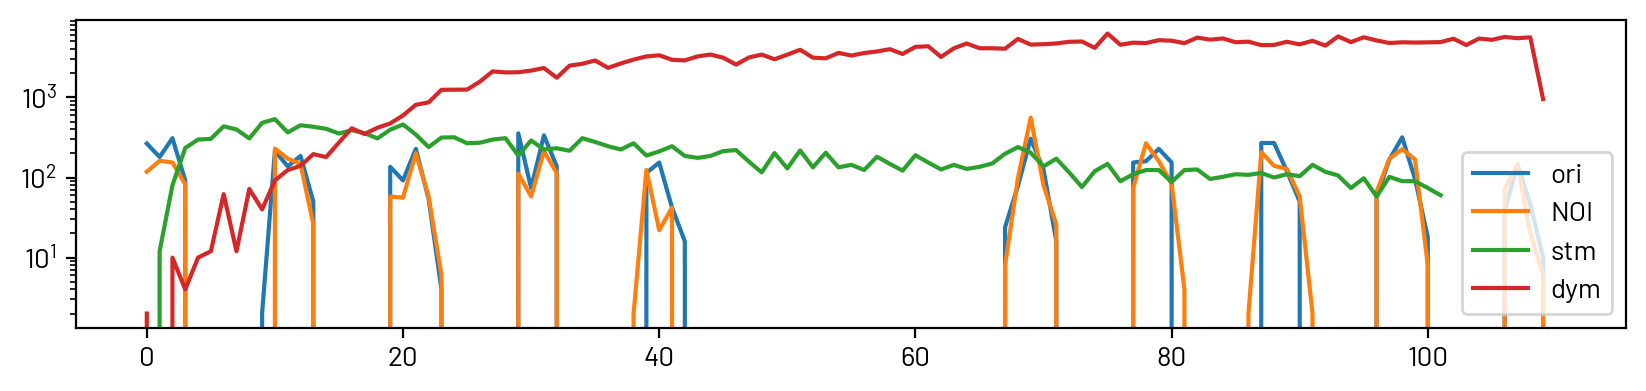

In [178]:
s = "s1"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

In [191]:
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

In [190]:
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

In [192]:
import json
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_stm, file,indent=2)

In [193]:
import json
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

In [195]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

# lh10

In [196]:
file_name = "LH10"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
etn_gen = load_ETNgen_graph(file_name,gap=299*M)
dym_gen = load_dym_graph(file_name,gap=1*M)
stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym7.dat
../Competitors_generated_graphs/Dymond/Multiple_run/LH10/LH10_dym8.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_7.dat
../Competitors_generated_graphs/STM/Multiple_run/LH10/LH10_STM_9.dat
../Competitors_generated_graphs/TagGen/Multiple_run/LH10/LH10_1_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/LH10/LH10_3_generato_TagGen.dat


In [197]:
len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])

(39, 39, 38, 32, 38)

In [198]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [200]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

In [201]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in etn_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)

In [202]:
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

In [203]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%3 ==0:
        print(len(tag_gen[0]),c)
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

38 3
38 6
38 9
38 12
38 15
38 18
38 21
38 24
38 27
38 30
38 33
38 36


In [204]:
occs_stm = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in stm_gen[0]:
    c = c  + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_stm[k].append(occurrences)
    if c%3 ==0:
        print(len(stm_gen[0]),c)
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_stm, file,indent=2)

32 3
32 6
32 9
32 12
32 15
32 18
32 21
32 24
32 27
32 30


In [205]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

38 3
38 6
38 9
38 12
38 15
38 18
38 21
38 24
38 27
38 30
38 33
38 36


# HighSchool

In [206]:
file_name = "High_School11"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
etn_gen = load_ETNgen_graph(file_name,gap=299*M)
dym_gen = load_dym_graph(file_name,gap=1*M)
stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym1.dat
../Competitors_generated_graphs/Dymond/Multiple_run/High_School11/High_School11_dym7.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_2.dat
../Competitors_generated_graphs/STM/Multiple_run/High_School11/High_School11_STM_0.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_8_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/High_School11/High_School11_5_generato_TagGen.dat


In [207]:
len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])

(31, 31, 30, 29, 30)

In [209]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [210]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

In [211]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in etn_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)
    if c%3 == 0:
        print(c)
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

3
6
9
12
15
18
21
24
27
30


In [267]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%3 ==0:
        print(len(tag_gen[0]),c)
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

30 3
30 6
30 9
30 12
30 15
30 18
30 21
30 24
30 27
30 30


In [213]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

29 3
29 6
29 9
29 12
29 15
29 18
29 21
29 24
29 27


In [214]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

30 3
30 6
30 9
30 12
30 15
30 18
30 21
30 24
30 27
30 30


# load and plot motifs per snpashot

In [259]:
def load_motif_counts(file_name):
    ori_count = json.load(open("topology_results/original_distributions/"+file_name+"/motifs_snap.json"))
    etn_count = json.load( open('topology_results/etngen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    tag_count = json.load( open('topology_results/taggen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    stm_count = json.load( open('topology_results/stmgen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    dym_count = json.load( open('topology_results/dymgen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    
    return ori_count,etn_count,tag_count,stm_count,dym_count

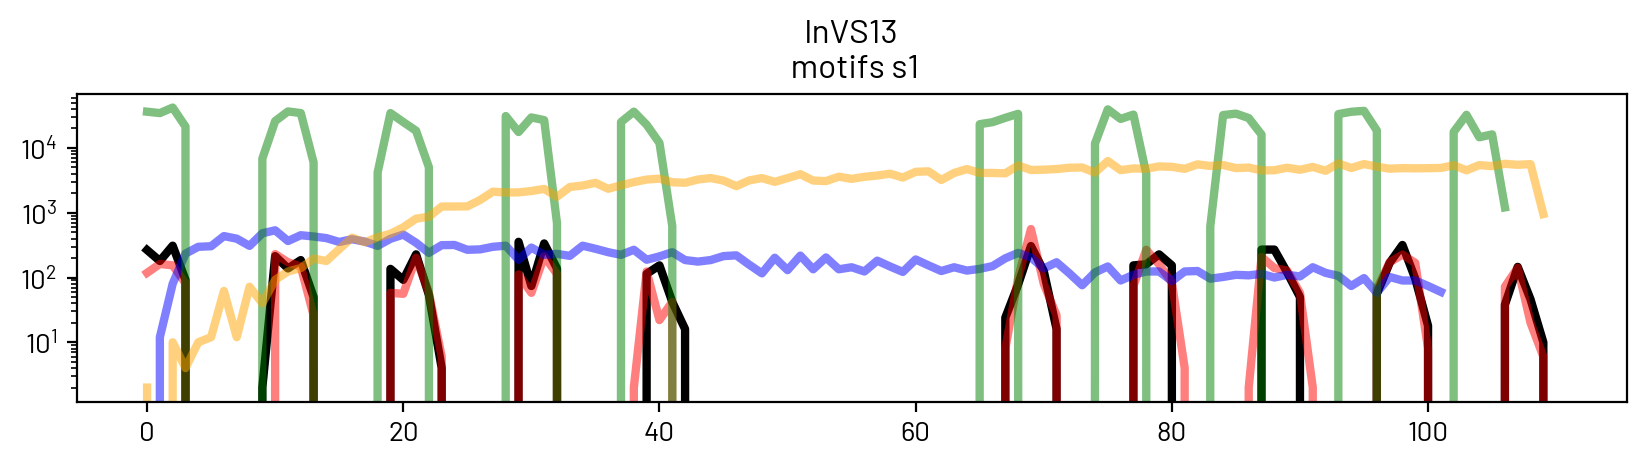

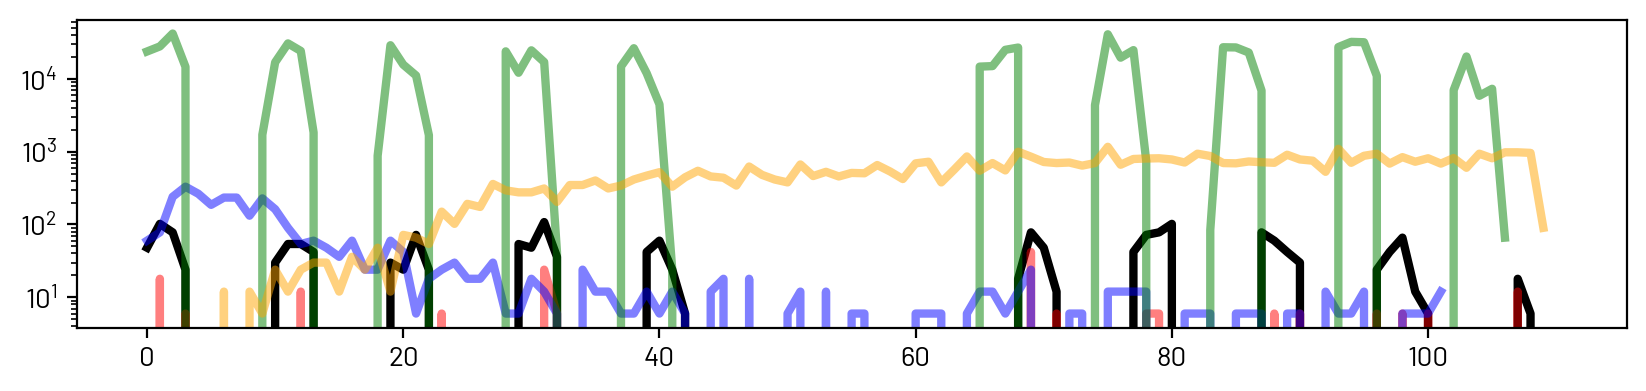

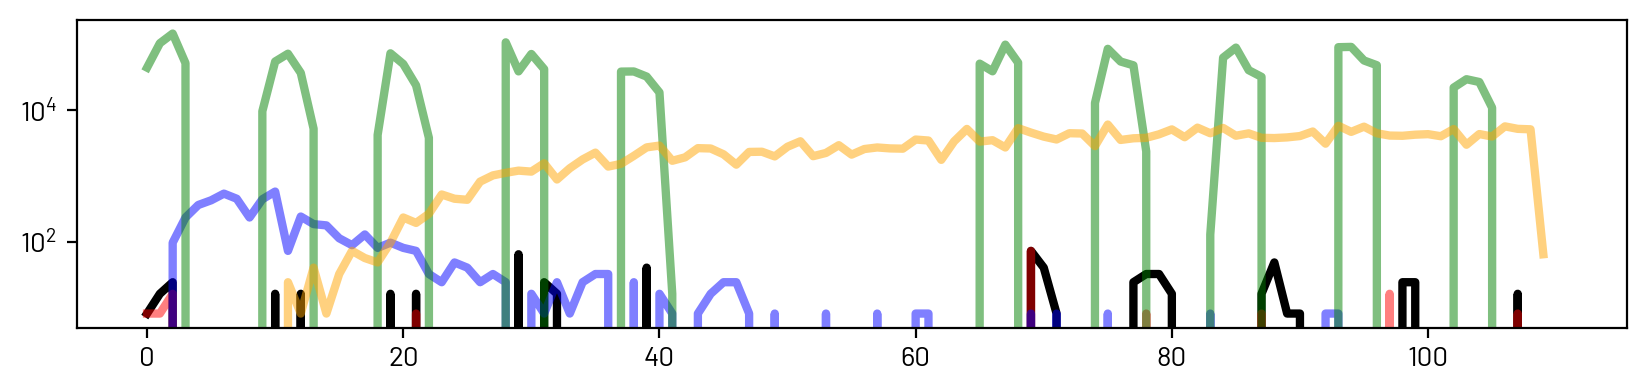

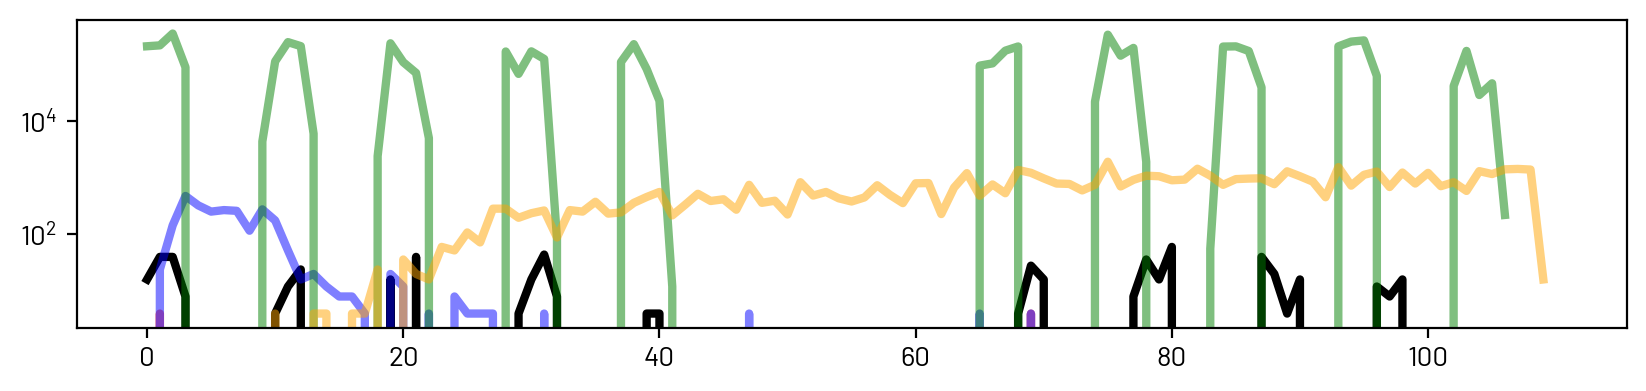

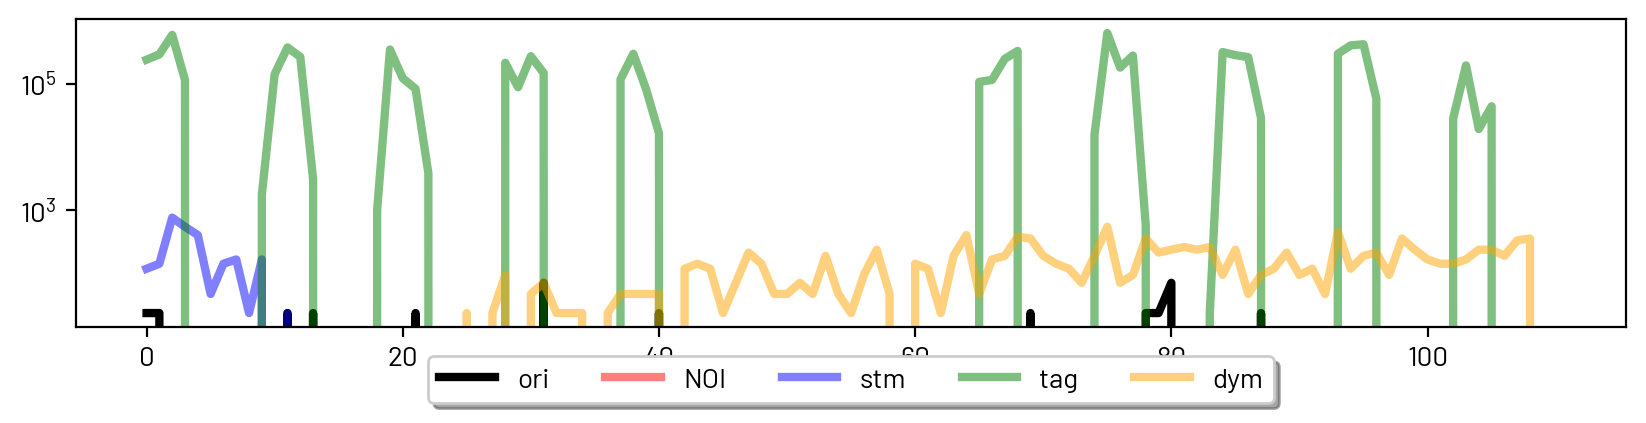

In [264]:
file_name = "InVS13"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

s = "s5"
a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:

    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="ori",alpha=1,color="black",linewidth=lw)
    plt.plot(etn_count[s],label="NOI",alpha=a,color="red",linewidth=lw)
    plt.plot(stm_count[s],label="stm",alpha=a,color="blue",linewidth=lw)
    plt.plot(tag_count[s],label="tag",alpha=a,color="green",linewidth=lw)
    plt.plot(dym_count[s],label="dym",alpha=a,color="orange",linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()

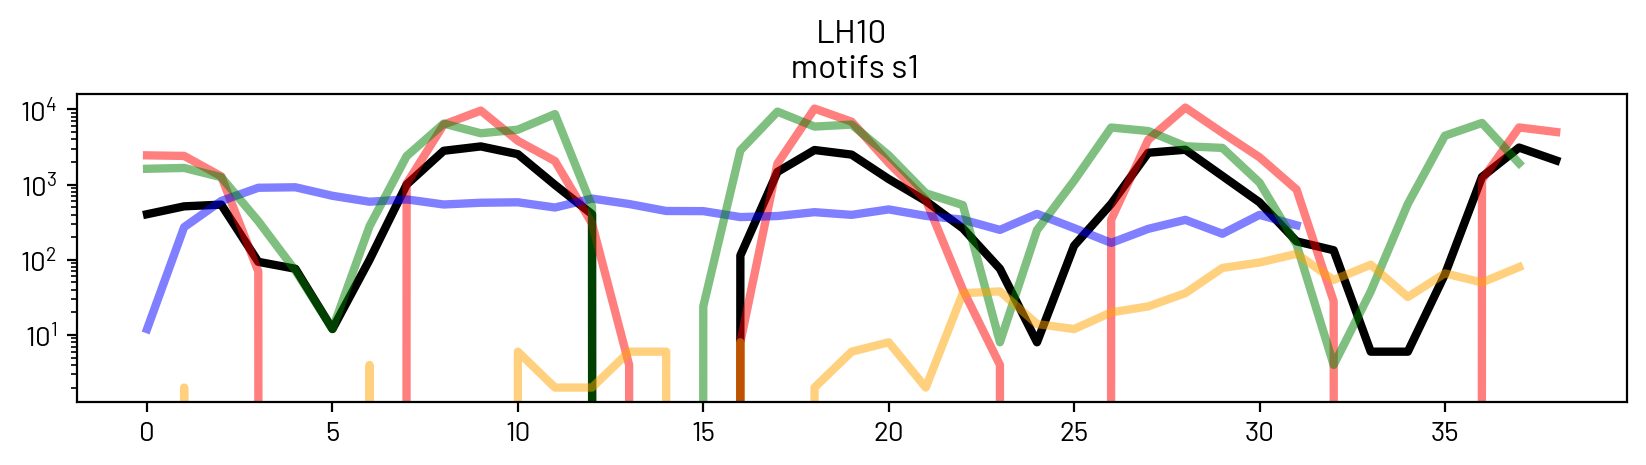

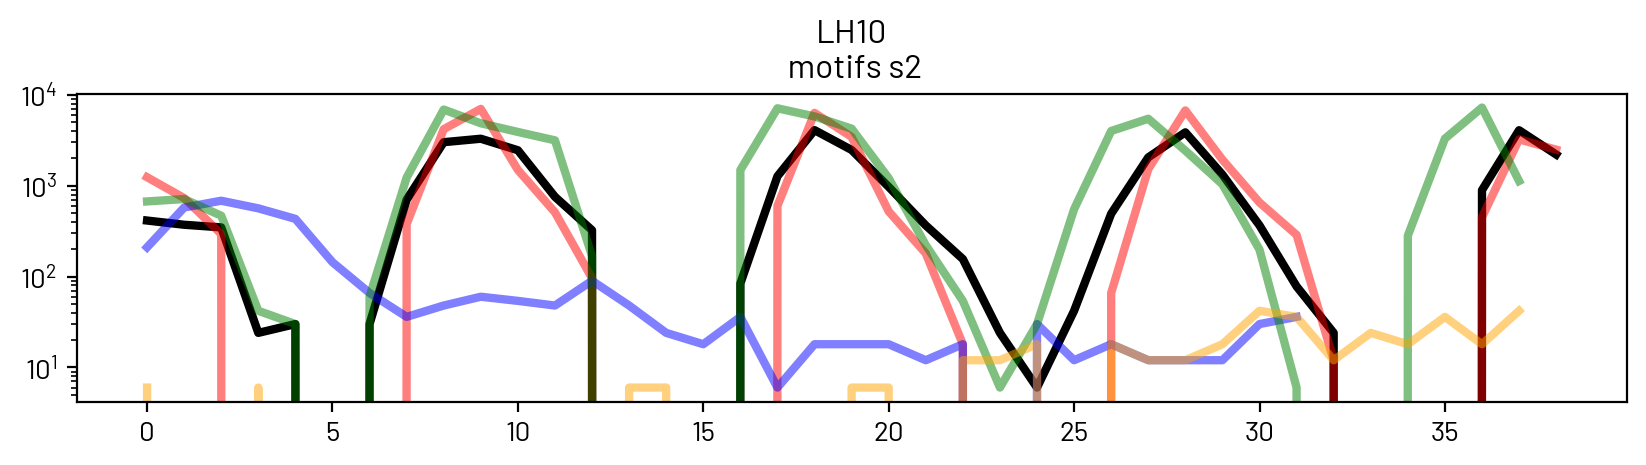

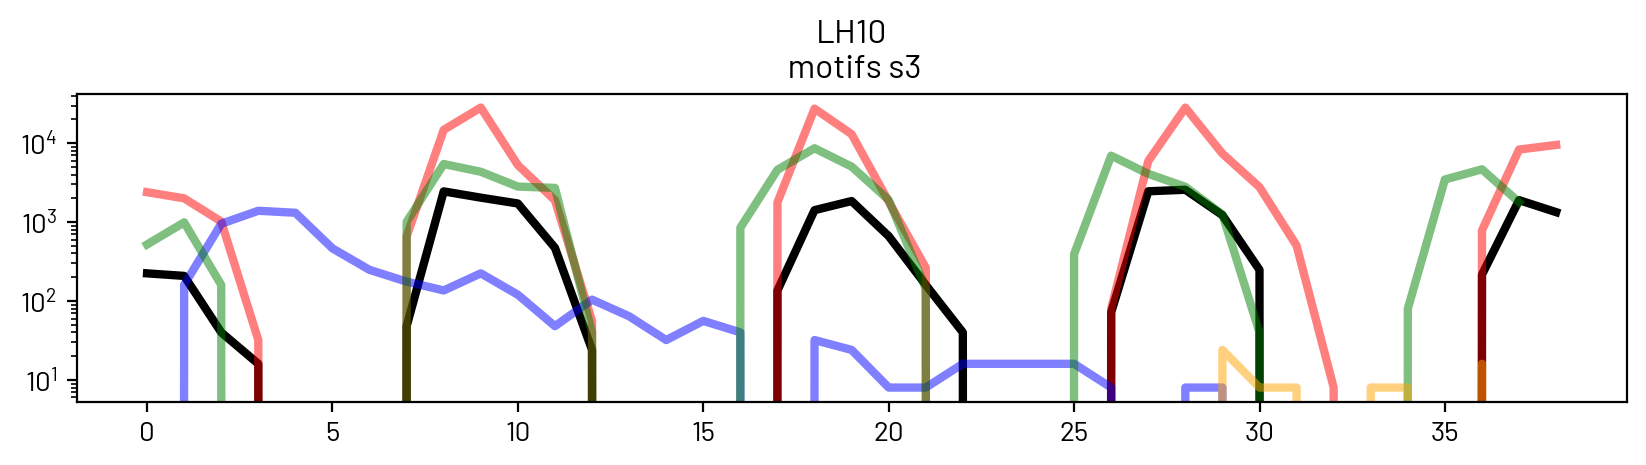

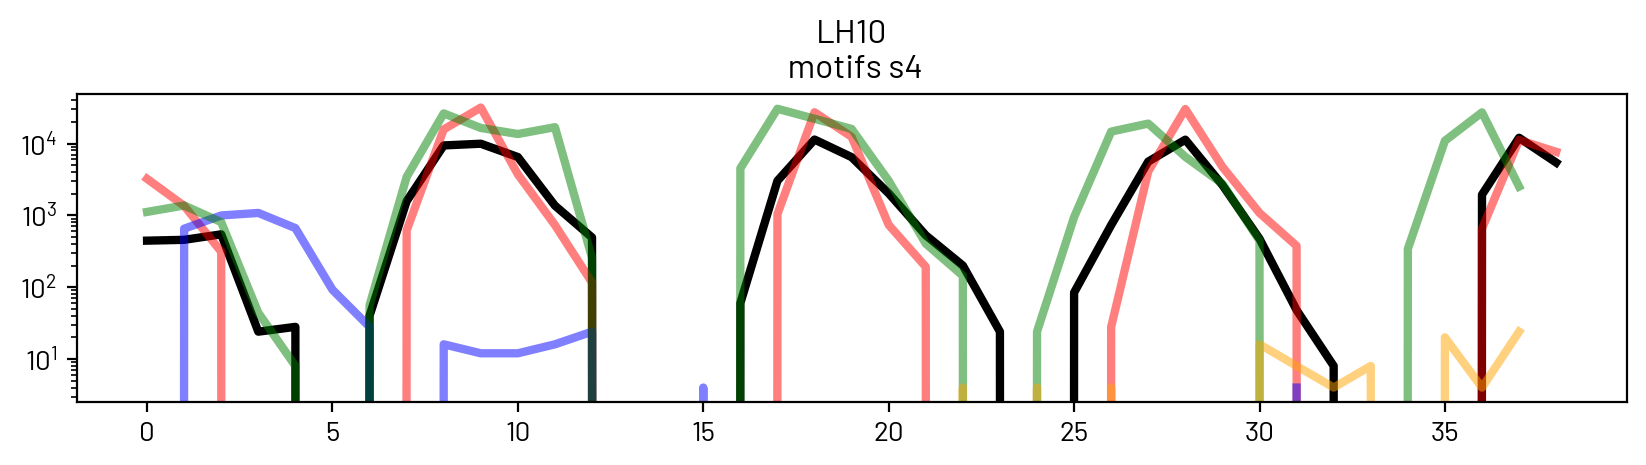

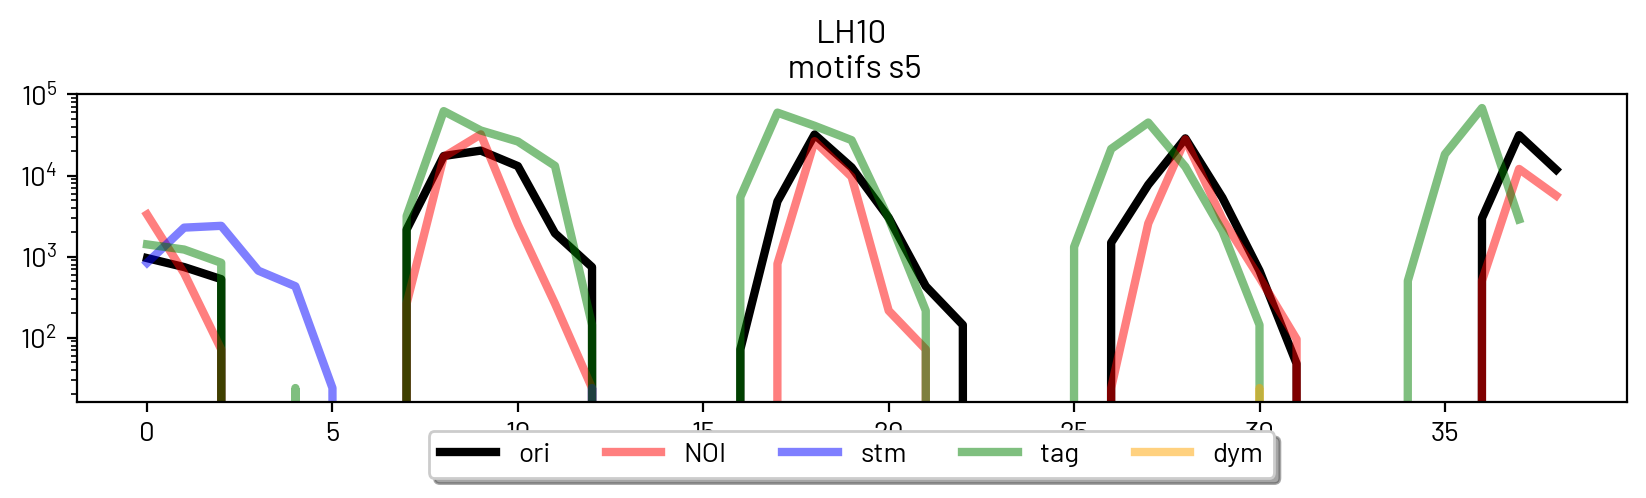

In [265]:
file_name = "LH10"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

s = "s5"
a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:


    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="ori",alpha=1,color="black",linewidth=lw)
    plt.plot(etn_count[s],label="NOI",alpha=a,color="red",linewidth=lw)
    plt.plot(stm_count[s],label="stm",alpha=a,color="blue",linewidth=lw)
    plt.plot(tag_count[s],label="tag",alpha=a,color="green",linewidth=lw)
    plt.plot(dym_count[s],label="dym",alpha=a,color="orange",linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()

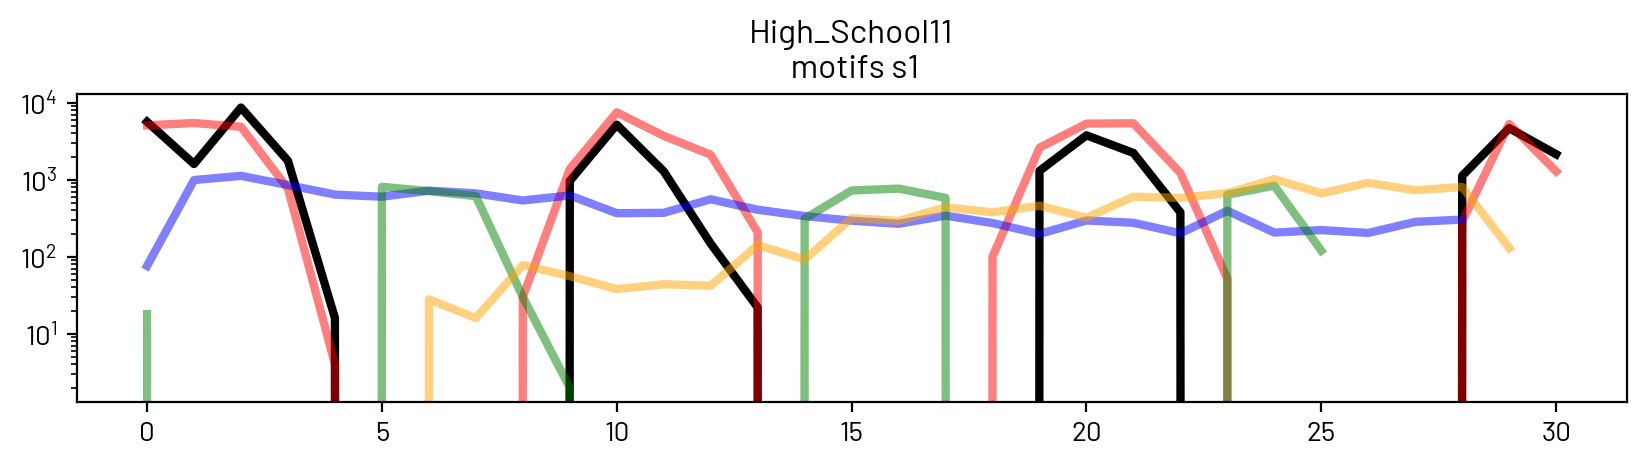

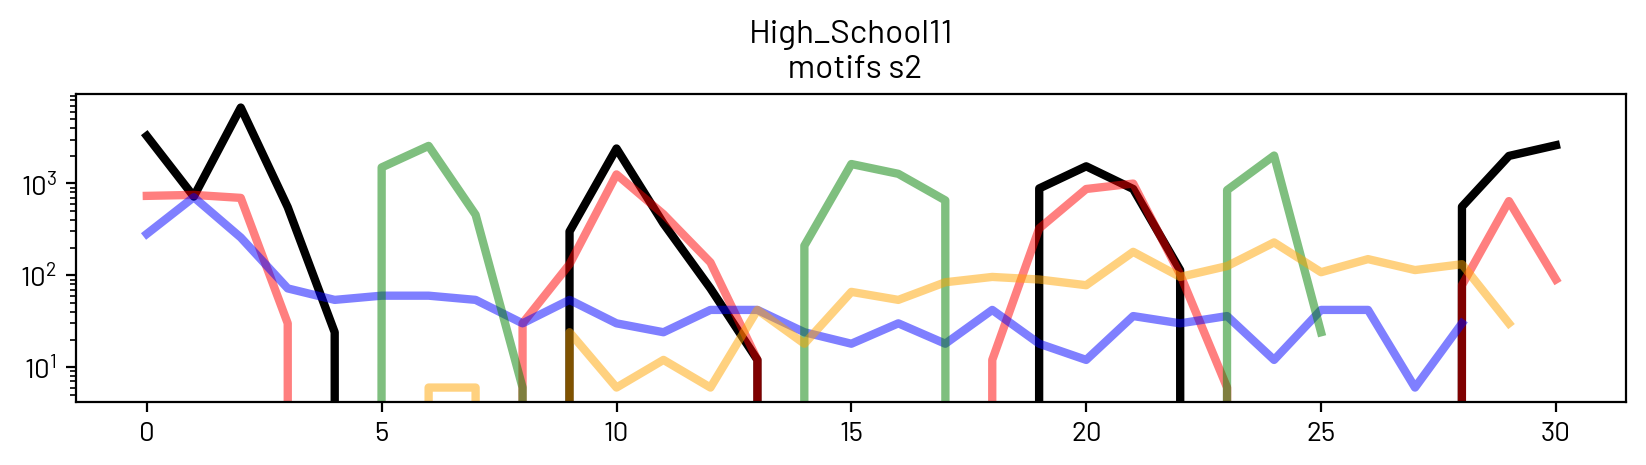

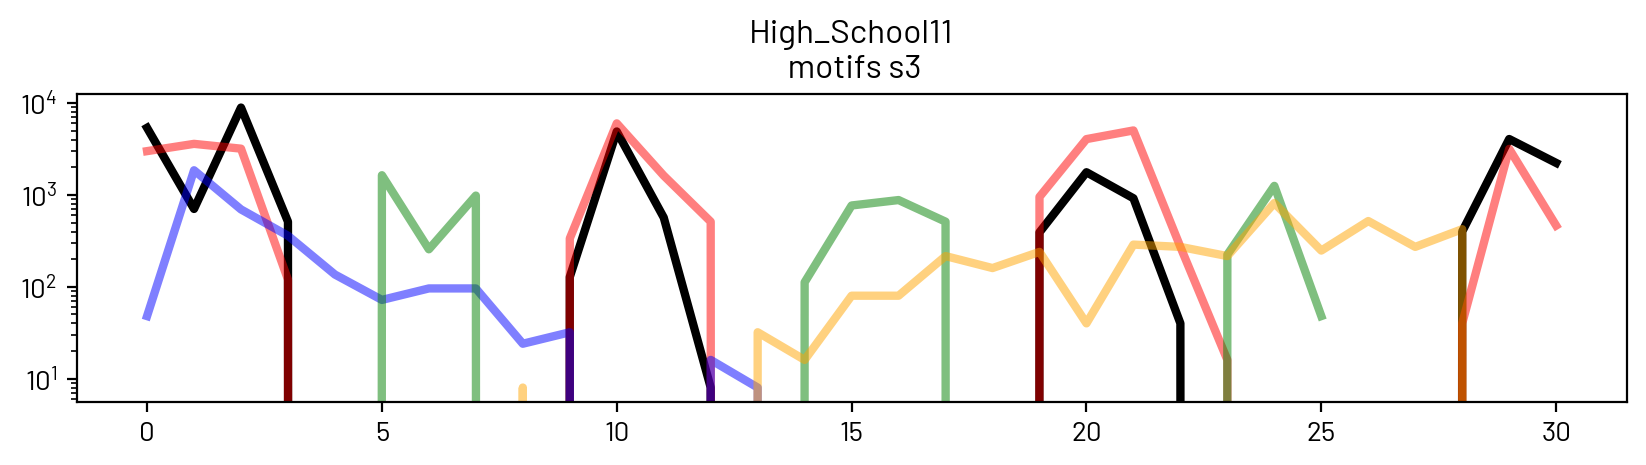

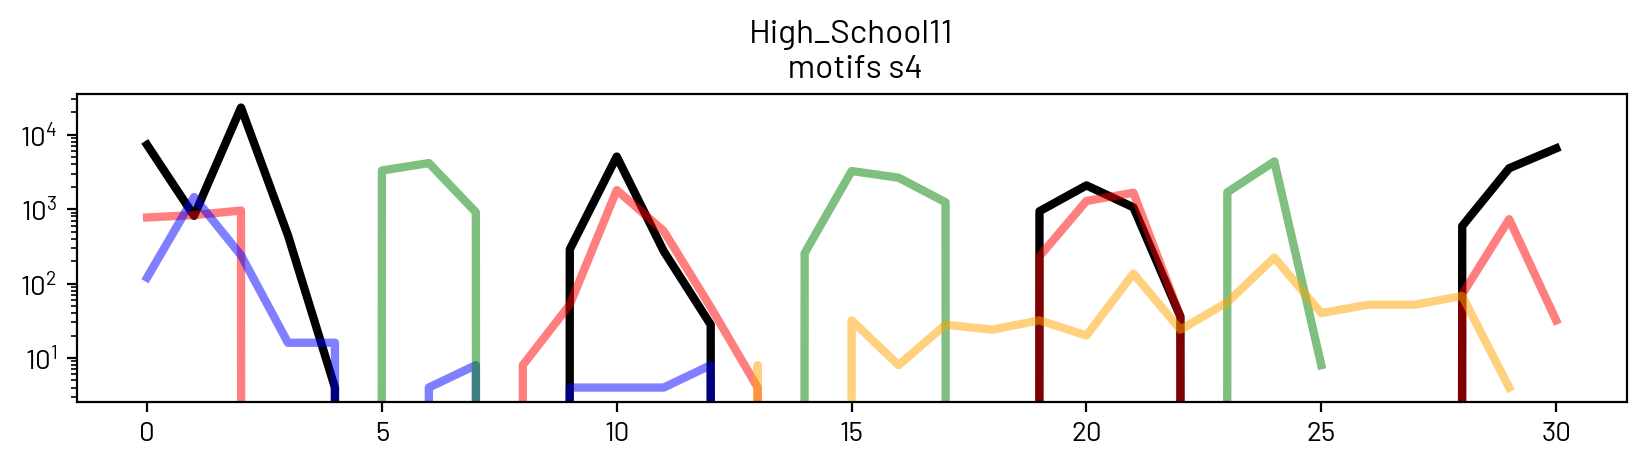

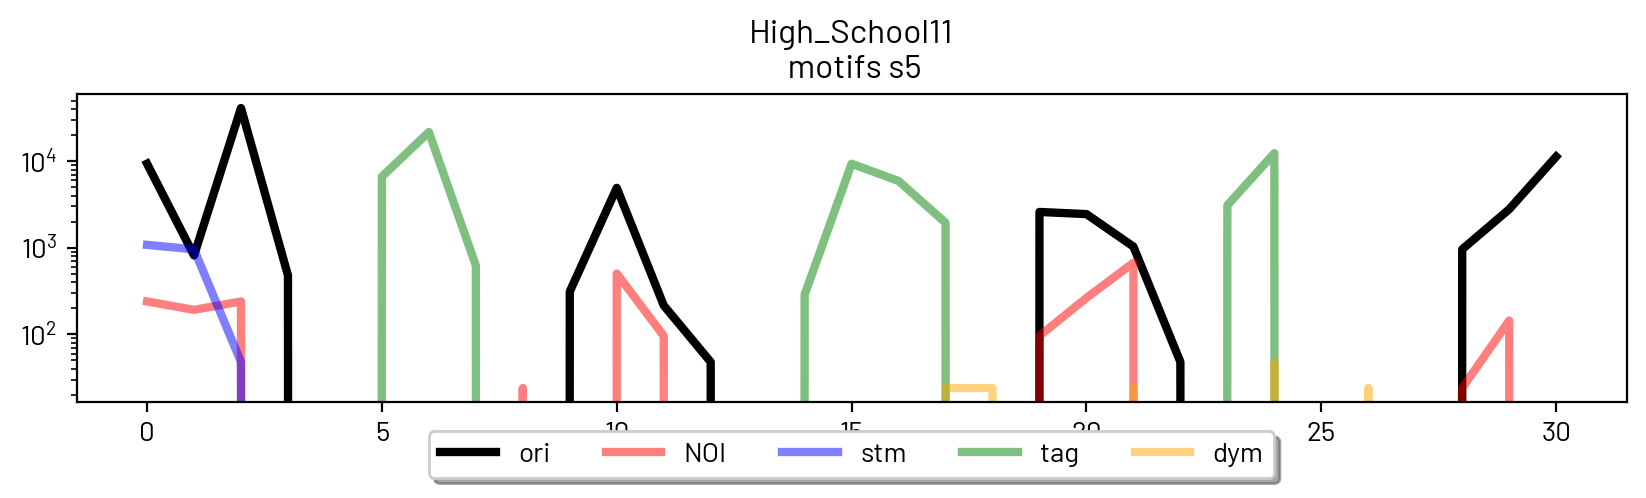

In [266]:
file_name = "High_School11"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

s = "s5"
a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:


    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="ori",alpha=1,color="black",linewidth=lw)
    plt.plot(etn_count[s],label="NOI",alpha=a,color="red",linewidth=lw)
    plt.plot(stm_count[s],label="stm",alpha=a,color="blue",linewidth=lw)
    plt.plot(tag_count[s],label="tag",alpha=a,color="green",linewidth=lw)
    plt.plot(dym_count[s],label="dym",alpha=a,color="orange",linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()